# Separierte Faltung mit Gauß

In [319]:
#Imports
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

In [320]:
# Gaussformel
def gauss(n, sigma):
    return np.exp(-((n * n) / (2 * sigma * sigma))) / np.sqrt(2 * np.pi * sigma * sigma)

In [321]:
# TODO: Ergebnis ist noch falsch
def create_convolution_kernel(sigma, precision):
    # k berechnen
    k = int (precision * sigma)
    
    # Array für Gausskern initialisieren
    kernel = np.zeros(2 * k + 1)
    
    # Gaussfunktion anwenden
    for n in range(-k,k+1):
        kernel[n + k] = gauss(n, sigma)
    
    # Debug: print kernel
    print(f"kernel: {kernel}")

    # Kern in Ganzzahlkern umwandeln
    int_kernel = np.zeros_like(kernel)
    for i in range(len(kernel)):
        int_kernel[i] = round(kernel[i]/kernel[0])

    # Debug: print int_kernel
    print(f"int_kernel: {int_kernel}")

    # Summe aller Kernelemente auf 1 normieren
    sum = 0
    for i in range(len(int_kernel)):
        sum += int_kernel[i]
    normed_kernel = int_kernel / sum

    # Debug: print kernel
    print(f"normed_kernel: {normed_kernel}")
    return normed_kernel

In [322]:
create_convolution_kernel(1.05, 2.5)
#np.array([1,4,6,4,1]) / sum(np.array([1,4,6,4,1]))

kernel: [0.0619277  0.24141365 0.37994503 0.24141365 0.0619277 ]
int_kernel: [1. 4. 6. 4. 1.]
normed_kernel: [0.0625 0.25   0.375  0.25   0.0625]


array([0.0625, 0.25  , 0.375 , 0.25  , 0.0625])

In [323]:
def convolute_1D(image_array, kernel, horizontal=1):
    # Array für die Faltung initialisieren
    convoluted_image_array = np.zeros_like(image_array)

    # Maße des Bildes bestimmen
    height, width = image_array.shape

    # Faltungsrichtung bestimmen (horizontal / vertikal)
    vertical = int(not(horizontal))

    # Padding: Wrap Border
    padding_width = int(len(kernel) / 2 + 1)
    padded_image_array = np.pad(image_array, padding_width, mode='wrap')

    # Faltung
    for x in range(width):
        for y in range(height):
            for k in range(len(kernel)):
                old_pixel = padded_image_array[padding_width + y - vertical * k][padding_width + x - horizontal * k]
                new_pixel = old_pixel * kernel[k]
                convoluted_image_array[y][x] += new_pixel

    return convoluted_image_array

kernel: [0.04839414 0.05793831 0.06664492 0.07365403 0.07820854 0.07978846
 0.07820854 0.07365403 0.06664492 0.05793831 0.04839414]
int_kernel: [1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1.]
normed_kernel: [0.0625 0.0625 0.0625 0.125  0.125  0.125  0.125  0.125  0.0625 0.0625
 0.0625]


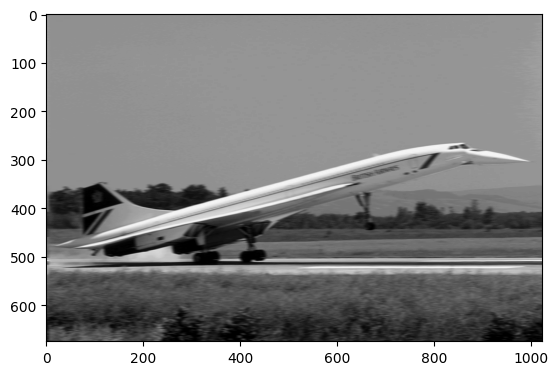

In [324]:
# Bild einlesen und in numpy-array umwandeln
image = Image.open("concorde.png")
image_array = np.array(image, dtype='uint8')

image_array = convolute_1D(image_array, create_convolution_kernel(5, 1))
plt.imshow(image_array, cmap='gray', vmin=0, vmax=256)

In [325]:
def convolute_seperated_2D(image_array, horizontal_kernel, vertical_kernel):
    horizontal_convoluted = convolute_1D(image_array, horizontal_kernel, 1)
    return convolute_1D(horizontal_convoluted, vertical_kernel, 0)

kernel: [0.04839414 0.05793831 0.06664492 0.07365403 0.07820854 0.07978846
 0.07820854 0.07365403 0.06664492 0.05793831 0.04839414]
int_kernel: [1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1.]
normed_kernel: [0.0625 0.0625 0.0625 0.125  0.125  0.125  0.125  0.125  0.0625 0.0625
 0.0625]


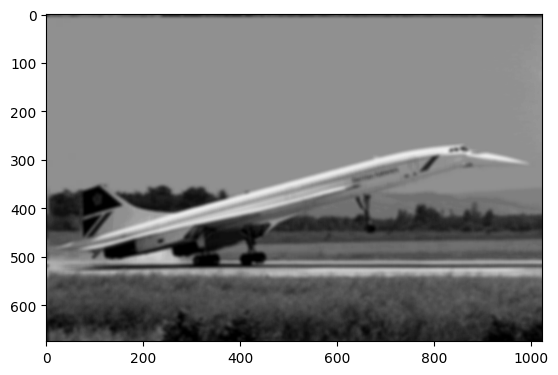

In [326]:
# Bild einlesen und in numpy-array umwandeln
image = Image.open("concorde.png")
image_array = np.array(image, dtype='uint8')

kernel = create_convolution_kernel(5, 1)
image_array = convolute_seperated_2D(image_array, kernel, kernel)
plt.imshow(image_array, cmap='gray', vmin=0, vmax=256)

In [327]:
def create_2D_convolution_kernel(sigma, precision):
    horizontal_kernel = create_convolution_kernel(sigma, precision)
    vertical_kernel = np.transpose(horizontal_kernel)
    # dyadisches Produkt
    kernel = np.outer(vertical_kernel, horizontal_kernel)
    # Summe aller Kernelemente auf 1 normieren
    sum = 0

    for i in range(len(kernel)):
        for j in range(len(kernel[0])):
            sum += kernel[i][j]
    kernel = kernel / sum 
    print(f"Kernel: {kernel}")
    return kernel

In [328]:
create_2D_convolution_kernel(0.75, 2.5)
hori = np.array([1,2,1])
verti = np.transpose(hori)

kernel = np.outer(verti, hori)
sum = 0

for i in range(len(kernel)):
    for j in range(len(kernel[0])):
        sum += kernel[i][j]
kernel / sum

kernel: [0.2186801  0.53192304 0.2186801 ]
int_kernel: [1. 2. 1.]
normed_kernel: [0.25 0.5  0.25]
Kernel: [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [329]:
def convolute_2D(image_array, kernel):
    # Array für die Faltung initialisieren
    convoluted_image_array = np.zeros_like(image_array)

    # Maße des Bildes bestimmen
    height, width = image_array.shape

    # Padding: Wrap Border
    padding_width = int(len(kernel) / 2 + 1)
    padded_image_array = np.pad(image_array, padding_width, mode='wrap')

    # Faltung
    for x in range(width):
        for y in range(height):
            for k in range(len(kernel)):
                for l in range(len(kernel[0])):
                    old_pixel = padded_image_array[padding_width + y - int(k/2)][padding_width + x - int(l/2)]
                    new_pixel = old_pixel * kernel[l][k]
                    convoluted_image_array[y][x] += new_pixel

    return convoluted_image_array

kernel: [0.04839414 0.05793831 0.06664492 0.07365403 0.07820854 0.07978846
 0.07820854 0.07365403 0.06664492 0.05793831 0.04839414]
int_kernel: [1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1.]
normed_kernel: [0.0625 0.0625 0.0625 0.125  0.125  0.125  0.125  0.125  0.0625 0.0625
 0.0625]
Kernel: [[0.00390625 0.00390625 0.00390625 0.0078125  0.0078125  0.0078125
  0.0078125  0.0078125  0.00390625 0.00390625 0.00390625]
 [0.00390625 0.00390625 0.00390625 0.0078125  0.0078125  0.0078125
  0.0078125  0.0078125  0.00390625 0.00390625 0.00390625]
 [0.00390625 0.00390625 0.00390625 0.0078125  0.0078125  0.0078125
  0.0078125  0.0078125  0.00390625 0.00390625 0.00390625]
 [0.0078125  0.0078125  0.0078125  0.015625   0.015625   0.015625
  0.015625   0.015625   0.0078125  0.0078125  0.0078125 ]
 [0.0078125  0.0078125  0.0078125  0.015625   0.015625   0.015625
  0.015625   0.015625   0.0078125  0.0078125  0.0078125 ]
 [0.0078125  0.0078125  0.0078125  0.015625   0.015625   0.015625
  0.015625   0.015625   0.007

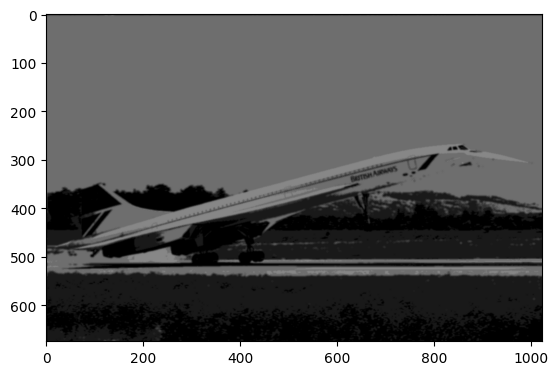

In [330]:
# Bild einlesen und in numpy-array umwandeln
image = Image.open("concorde.png")
image_array = np.array(image, dtype='uint8')

kernel = create_2D_convolution_kernel(5, 1)
image_array = convolute_2D(image_array, kernel)
plt.imshow(image_array, cmap='gray', vmin=0, vmax=256)

# Morphologische Filter

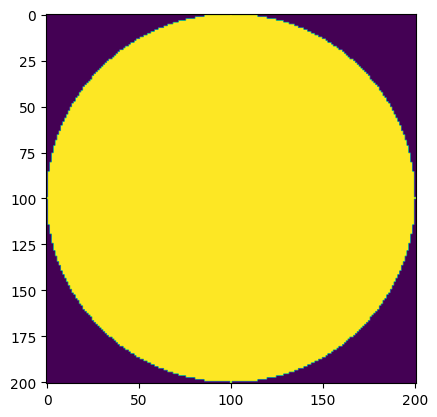

In [331]:
def create_circular_mask(radius):
    # größe der Matrix in Abhängigkeit vom Radius berechnen
    size = radius * 2 + 1

    # leere Matrix erstellen
    circle = np.zeros((size,size))
    
    # über jeden Pixel iterieren und überprüfen, ob er im Kreis ist (mit Pythagoras)
    for x in range(size):
        for y in range(size):
            # Es wird der Abstand zwischen dem derzeitigem Pixel und dem Mittelpunkt ermittelt
            # a^2 + b^2 = c^2
            a = radius - x
            b = radius - y
            c_square = a ** 2 + b ** 2
            c = np.sqrt(c_square)

            # Wenn der Abstand zwischen Mittelpunkt und 
            # derzeitigem Pixel kleinergleich Radius ist, liegt der Pixel im Kreis
            if (c <= radius):
                circle[x][y] = 1
            
    return circle
plt.imshow(create_circular_mask(100))

In [332]:
# Funktioniert nur mit Graubildern
def erode(image_array, radius): 
    
    # Konstante definieren
    MAX_PIXEL_VALUE = 255

    # Maße des Bildes bestimmen
    height, width = image_array.shape

    # Maske erzeugen
    mask = create_circular_mask(radius)

    # 0 mit maximal möglichem Wert ersetzen, damit besser das Minimum bestimmt werden kann
    mask[mask == 0] = MAX_PIXEL_VALUE

    # Constant-Border als Randbehandlung
    padded_image_array = np.pad(image_array, radius, 'constant', constant_values=MAX_PIXEL_VALUE)

    # Zielbild initialisieren
    eroded_image_array = np.zeros_like(image_array)

    # Maske mit Bild falten
    for x in range(width):
        for y in range(height):
            min = MAX_PIXEL_VALUE
            x_pad = x + radius
            y_pad = y + radius

            for x_mask in range(len(mask)):
                for y_mask in range(len(mask[0])):
                    if (padded_image_array[y_pad- y_mask][x_pad - x_mask] * mask[y_mask][x_mask] < min):
                        min = padded_image_array[y_pad - y_mask][x_pad - x_mask]

            eroded_image_array[y][x] = min
    return eroded_image_array

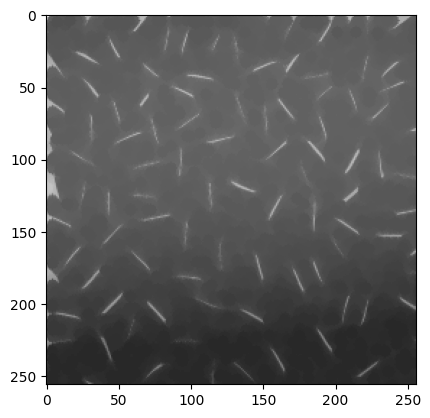

In [333]:
# Bild einlesen und in numpy-array umwandeln
image = Image.open("rice.png")
image_array = np.array(image, dtype='uint8')

# Plot 
plt.imshow(erode(image_array, 4), cmap='gray', vmin=0, vmax=2**8)

In [334]:
# Funktioniert nur mit Graubildern
def dilate(image_array, radius): 
    
    # Konstante definieren
    MIN_PIXEL_VALUE = 0

    # Maße des Bildes bestimmen
    height, width = image_array.shape

    # Maske erzeugen
    mask = create_circular_mask(radius)

    # 0 mit maximal möglichem Wert ersetzen, damit besser das Minimum bestimmt werden kann
    mask[mask == 0] = MIN_PIXEL_VALUE

    # Constant-Border als Randbehandlung
    padded_image_array = np.pad(image_array, radius, 'constant', constant_values=MIN_PIXEL_VALUE)

    # Zielbild initialisieren
    dilated_image_array = np.zeros_like(image_array)

    # Maske mit Bild falten
    for x in range(width):
        for y in range(height):
            max = MIN_PIXEL_VALUE
            x_pad = x + radius
            y_pad = y + radius

            for x_mask in range(len(mask)):
                for y_mask in range(len(mask[0])):
                    if (padded_image_array[y_pad- y_mask][x_pad - x_mask] * mask[y_mask][x_mask] > max):
                        max = padded_image_array[y_pad - y_mask][x_pad - x_mask]

            dilated_image_array[y][x] = max
    return dilated_image_array

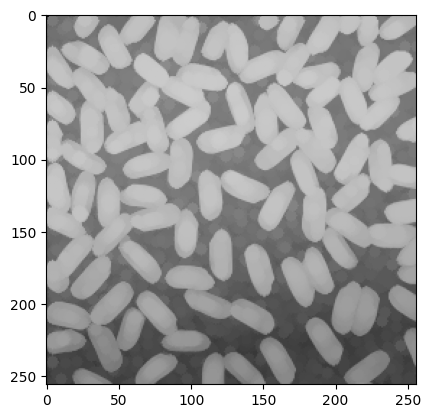

In [335]:
# Bild einlesen und in numpy-array umwandeln
image = Image.open("rice.png")
image_array = np.array(image, dtype='uint8')

# Plot 
plt.imshow(dilate(image_array, 4), cmap='gray', vmin=0, vmax=2**8)

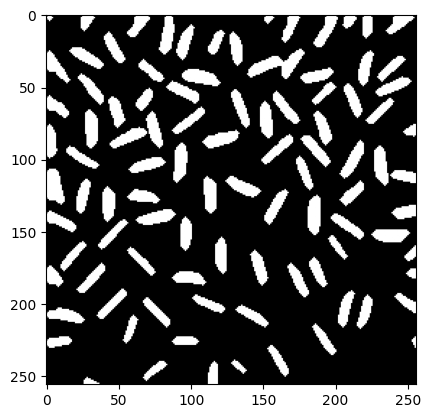

In [336]:
def opening(image_array, radius):
    eroded_image_array = erode(image_array,radius)
    return dilate(eroded_image_array,radius)

# Bild einlesen und in numpy-array umwandeln
image = Image.open("rice_binarisiert.png")
image_array = np.array(image, dtype='uint8')

# Plot 
plt.imshow(opening(image_array, 2), cmap='gray', vmin=0, vmax=2**8)

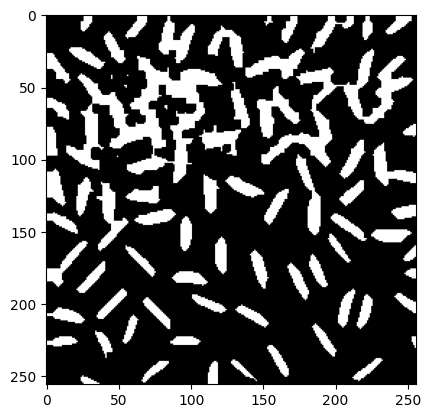

In [337]:
def closing(image_array, radius):
    dilated_image_array = dilate(image_array,radius)
    return erode(dilated_image_array,radius)

# Bild einlesen und in numpy-array umwandeln
image = Image.open("rice_binarisiert.png")
image_array = np.array(image, dtype='uint8')

# Plot 
plt.imshow(closing(image_array, 2), cmap='gray', vmin=0, vmax=2**8)